<center><h2>Klasifikácia a predikcia kategórií BMI na základe údajov o ľudskom tele</h2></center>

<h1>Ciele práce</h1>

- vysvetlit pojem BMI,

- upravit dataset,

- vytvorit a natrenovat model neuronovej siete,

- testovat presnost vytvoreneho modelu.

<h1>Pojem BMI</h1>

Co je to BMI? Body Mass Index – index telesnej hmotnosti. Ide o metodu, ktora urcuje hranice prijatelnej telesnej hmotnosti u dospelej osoby zo zdravotného hladiska vzhladom k zdravotnemu riziku. Norma BMI je 18,5 až 24,9. Na vypocet BMI sa pouziva vzorec BMI: m/h², kde m je telesna hmotnost v kilogramoch a h je telesna vyska v centimetroch.

<h1>Úprava datasetu</h1>

Dataset som si stiahol zo stranky - <a href="https://www.kaggle.com/yersever/500-person-gender-height-weight-bodymassindex?select=500_Person_Gender_Height_Weight_Index.csv">link</a>. Dataset urcuje BMI (body mass index) kategorie na zaklade udajov o ludskom tele (vyska,vaha).

Importovanie kniznic:

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # grafy

Nacitam si subor "500_Person_Gender_Height_Weight.csv" do pandas dataframu a vypisem prvych 5 a poslednych 5 zaznamov z DF.

In [18]:
df = pd.read_csv("500_Person_Gender_Height_Weight_Index.csv",sep=",")
df

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


V prvom stlpci sa nachadzaju udaje o pohlavi (male = muz, female = zena). V druhom stlpci su uvedene height = vysky v centimetroch. V tretom su uvedene weight = vahy v kilogramoch. Vidime ze v poslednom stlpci -Index- sa nachadzaju jednotlive kategorie BMI, ale nevieme si overit, ci su hodnoty spravne rozdelene do jednotlivych skupin. Preto som sa rozhodol trosku upravit dataset, odstranit stlpec Index a znovu vypocitat BMI (body mass index) na zaklade udajov o vyske,vahe. Vzorec pre vypocet: BMI = m/h², kde m je telesna hmotnost v kilogramoch a h je telesna vyska v centimetroch.

In [19]:
del df["Index"] # zmazem stlpec index 

In [20]:
bmi = []
for index, row in df.iterrows():
        # vypocet a pridanie hodnot do pola na zaklade vzorca BMI = m/h²,
        bmi.append(round( df.iloc[index,2]/np.square(df.iloc[index,1]) *10000,1)) 
df["BMI"] = bmi # pridavam novy stlpec BMI

Pre pomoc pri rozdelovani hodnot do jednotlivych kategorii som pouzival nasledujuci obrazok:

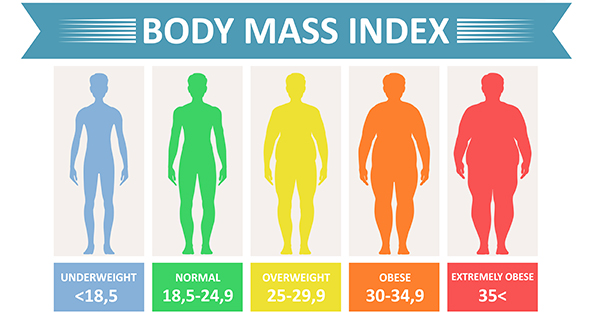

In [21]:
from IPython.display import Image
Image("img_bmi.jpg")

Cyklus:
- Ak hodnota na riadku "index" v stlpci 3 (cize v stlpci BMI) je mensia alebo sa rovna 18.5 - pridaj do pola "categories" cislo 0. V nasom pripade to bude znamenat podvahu.
- Ak hodnota na riadku "index" v stlpci 3 (cize v stlpci BMI) je vacsia, ako 18.5 a zaroven je mensia alebo sa rovna 24.9 -   pridaj do pola "categories" cislo 1. V nasom pripade to bude znamenat normalnu vahu.
- Ak hodnota na riadku "index" v stlpci 3 (cize v stlpci BMI) je vacsia alebo sa rovna 25 a zaroven je mensia alebo sa rovna 29.9 - pridaj do pola "categories"cislo 2. V nasom pripade to bude znamenat nadvahu.
- Ak hodnota na riadku "index" v stlpci 3 (cize v stlpci BMI) je vacsia alebo sa rovna 30 a zaroven je mensia alebo sa rovna 34.9 - pridaj do pola "categories" cislo 3. V nasom pripade to bude znamenat obezitu.
- Ak hodnota na riadku "index" v stlpci 3 (cize v stlpci BMI) je vacsia alebo sa rovna 35 - pridaj do pola "categories" cislo 4. V nasom pripade to bude znamenat extremnu obezitu.

In [22]:
categories = []
for index, row in df.iterrows():
    if ( df.iloc[index,3] <= 18.5 ):
        categories.append(0) # underweight = podvaha
        
    elif ( 18.5 < df.iloc[index,3] <= 24.9 ):
        categories.append(1) # normal = normalna vaha
        
    elif ( 25 <= df.iloc[index,3] <= 29.9 ):
        categories.append(2) # overweight = nadvaha
    
    elif ( 30 <= df.iloc[index,3] <= 34.9 ):
        categories.append(3) # obese = obezny
        
    elif ( df.iloc[index,3] >= 35 ):
        categories.append(4) # extremely obese = extremne obezny
df["Category"] = categories 

In [23]:
df.head(15)

,Gender,Height,Weight,BMI,Category
0,Male,174,96,31.7,3
1,Male,189,87,24.4,1
2,Female,185,110,32.1,3
3,Female,195,104,27.4,2
4,Male,149,61,27.5,2
5,Male,189,104,29.1,2
6,Male,147,92,42.6,4
7,Male,154,111,46.8,4
8,Male,174,90,29.7,2
9,Female,169,103,36.1,4


Hodnoty som zoradil podla stlpca BMI a indexy som resetoval.

In [24]:
df.sort_values(by=['BMI'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [25]:
df

,Gender,Height,Weight,BMI,Category
0,Male,198,50,12.8,0
1,Female,198,50,12.8,0
2,Female,196,50,13.0,0
3,Female,190,50,13.9,0
4,Male,190,50,13.9,0
...,...,...,...,...,...
495,Male,140,146,74.5,4
496,Female,140,146,74.5,4
497,Male,145,160,76.1,4
498,Male,140,152,77.6,4


<h1>Vizualizacia dat</h1>

S pomocou funkcie value_counts() som zistil pocet ludi v jednotlivych kategoriach.Pre vizualizaciu som pouzival kniznicu "seaborn". Pomocou tejto kniznice vizualizujem udaje z DF na zaklade stlpca Category. Z grafov jasne vidime, ze najvacsiu skupinu tvoria extremne obezni ludia. Naopak najmansiu skupinu tvoria ludia, ktori maju podvahu.

In [26]:
df.Category.value_counts() 

4    268
2     70
3     64
1     63
0     35
Name: Category, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

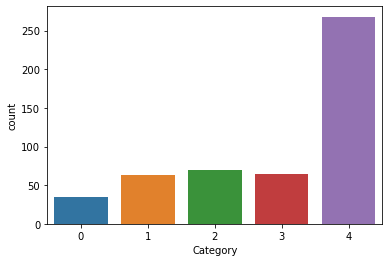

In [27]:
import seaborn as sns
sns.countplot(x='Category',data=df)

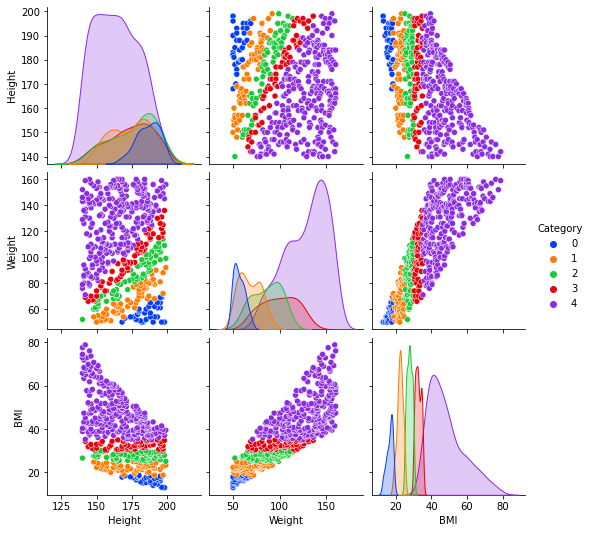

In [28]:
sns.pairplot(data=df, hue='Category', palette= "bright")

<h1>Praca s datasetom</h1>

V poli x som ulozil hodnoty o vyske a vahe. Nasledne v poli y som ulozil hodnoty stlpca "category".

In [29]:
x = df.iloc[:,[1,2]].values # stlpec height, weight
y = df.iloc[:,4].values # stlpec category

Pole y obsahuje cisla od 0 po 4, ktore su jednotlive kategorie. Aby neuronova siet mohla pracovat s hodnotami, musime  ich prekonvertovat na binarne cisla. Preto pole y som zmenil na kategoricku premennu, to znamena ze tam budeme mat iba binarne cisla (nuly a jednotky).
 - 1 0 0 0 0 = znamena, ze category -> 0
 - 0 1 0 0 0 = znamena, ze category -> 1
 - 0 0 1 0 0 = znamena, ze category -> 2
 - 0 0 0 1 0 = znamena, ze category -> 3
 - 0 0 0 0 1 = znamena, ce category -> 4


In [30]:
from keras.utils import to_categorical 
y = to_categorical(y)

In [31]:
y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

Pomocou funkcie train_test_split() som rozdelil udaje na trenovacie a testovacie. Dovody rozdelenia: Na trenovacich datach ucime neuronovu siet. Na overenie spravnosti/presnosti natrenovania NS pouzivame testovacie data.

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2) # test size urci podiel. 80% ku 20% 

<h1>Vytvorenie a trenovanie modelu  Keras</h1>

Na modelovanie NS som si vybral model Keras, pretoze je pouzivatelsky jednoduchy.

In [33]:
import keras 
from keras.models import Sequential # sekvencny model
from keras.layers import Dense # dense = vrstvy

V premennej moj_keras_model si inicializujem sekvencny model.Pomocou funkcie add() pridavam jednotlive vrstvy. Prva bude - vstupna vrstva s dvomi parametrami (vyska,vaha), s 30 neuronmi a s aktivacnou funkciou sigmoid. Vzorec pre akt. funkciu sigmoid: sigmoid(x) = 1 / (1 + exp(-x)). Druha bude - skryta vrstva s 30 neuronmi a s aktivacnou funkciou sigmoid. Vystupna vrstva bude mat 5 neuronov, co su hodnoty od 0 po 4 ( BMI kategorie). Pre vystupnu vrstvu som pouzival aktivacnu funkciu softmax, pretoze mame 5 kategorii.  Pomocou funkcie compile() si zadefinujem stratovu funkciu = loss, optimalizator = optimizer a metrics = metriky.

In [34]:
moj_keras_model = Sequential()
moj_keras_model.add(Dense(30,input_dim=2,activation="sigmoid")) # vstupna vrstva - 2 vstupy a 30 neuronov
moj_keras_model.add(Dense(30,activation="sigmoid")) # skryta vrstva - 30 neuronov
moj_keras_model.add(Dense(5,activation="softmax"))# vystupna vrstva - 5 neuronov

moj_keras_model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"]) 

Trenovanie neuronovej siete sa vykonava pomocou funkcie fit(), kde zadam vstupne parametre:X_train,y_train; validation_data: X_test,y_test.Epochs = pocet iteracii. Batch_size=toto cislo predstavuje, ze ake mnozstvo udajov sa spracovava naraz. Verbose=co vsetko bude obsahovat vypis (0-ziadne udaje,1-progress bar,2-loss a accuracy)

In [20]:
history = moj_keras_model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=1200,batch_size=20,verbose=2)

Epoch 1/1200
20/20 - 1s - loss: 1.5768 - accuracy: 0.2050 - val_loss: 1.4176 - val_accuracy: 0.5700
Epoch 2/1200
20/20 - 0s - loss: 1.3540 - accuracy: 0.5275 - val_loss: 1.2737 - val_accuracy: 0.5700
Epoch 3/1200
20/20 - 0s - loss: 1.2836 - accuracy: 0.5275 - val_loss: 1.2228 - val_accuracy: 0.5700
Epoch 4/1200
20/20 - 0s - loss: 1.2540 - accuracy: 0.5275 - val_loss: 1.1907 - val_accuracy: 0.5700
Epoch 5/1200
20/20 - 0s - loss: 1.2248 - accuracy: 0.5275 - val_loss: 1.1623 - val_accuracy: 0.5700
Epoch 6/1200
20/20 - 0s - loss: 1.1910 - accuracy: 0.5275 - val_loss: 1.1213 - val_accuracy: 0.5700
Epoch 7/1200
20/20 - 0s - loss: 1.1550 - accuracy: 0.5275 - val_loss: 1.0867 - val_accuracy: 0.5700
Epoch 8/1200
20/20 - 0s - loss: 1.1136 - accuracy: 0.5275 - val_loss: 1.0448 - val_accuracy: 0.5700
Epoch 9/1200
20/20 - 0s - loss: 1.0682 - accuracy: 0.5275 - val_loss: 0.9944 - val_accuracy: 0.5700
Epoch 10/1200
20/20 - 0s - loss: 1.0194 - accuracy: 0.5275 - val_loss: 0.9526 - val_accuracy: 0.5700

Epoch 83/1200
20/20 - 0s - loss: 0.5344 - accuracy: 0.7325 - val_loss: 0.5666 - val_accuracy: 0.7300
Epoch 84/1200
20/20 - 0s - loss: 0.5367 - accuracy: 0.7300 - val_loss: 0.5585 - val_accuracy: 0.7400
Epoch 85/1200
20/20 - 0s - loss: 0.5292 - accuracy: 0.7075 - val_loss: 0.5546 - val_accuracy: 0.7200
Epoch 86/1200
20/20 - 0s - loss: 0.5309 - accuracy: 0.7375 - val_loss: 0.5606 - val_accuracy: 0.7200
Epoch 87/1200
20/20 - 0s - loss: 0.5301 - accuracy: 0.7125 - val_loss: 0.5547 - val_accuracy: 0.7400
Epoch 88/1200
20/20 - 0s - loss: 0.5280 - accuracy: 0.7425 - val_loss: 0.5535 - val_accuracy: 0.7300
Epoch 89/1200
20/20 - 0s - loss: 0.5257 - accuracy: 0.7275 - val_loss: 0.5478 - val_accuracy: 0.7300
Epoch 90/1200
20/20 - 0s - loss: 0.5225 - accuracy: 0.7375 - val_loss: 0.5530 - val_accuracy: 0.7400
Epoch 91/1200
20/20 - 0s - loss: 0.5274 - accuracy: 0.7225 - val_loss: 0.5360 - val_accuracy: 0.7300
Epoch 92/1200
20/20 - 0s - loss: 0.5252 - accuracy: 0.7250 - val_loss: 0.5470 - val_accurac

Epoch 164/1200
20/20 - 0s - loss: 0.4519 - accuracy: 0.8025 - val_loss: 0.4739 - val_accuracy: 0.7900
Epoch 165/1200
20/20 - 0s - loss: 0.4532 - accuracy: 0.7925 - val_loss: 0.4679 - val_accuracy: 0.7900
Epoch 166/1200
20/20 - 0s - loss: 0.4484 - accuracy: 0.7825 - val_loss: 0.4818 - val_accuracy: 0.7900
Epoch 167/1200
20/20 - 0s - loss: 0.4500 - accuracy: 0.7800 - val_loss: 0.4705 - val_accuracy: 0.7800
Epoch 168/1200
20/20 - 0s - loss: 0.4432 - accuracy: 0.7875 - val_loss: 0.4840 - val_accuracy: 0.7800
Epoch 169/1200
20/20 - 0s - loss: 0.4439 - accuracy: 0.7800 - val_loss: 0.4700 - val_accuracy: 0.7900
Epoch 170/1200
20/20 - 0s - loss: 0.4408 - accuracy: 0.7750 - val_loss: 0.4754 - val_accuracy: 0.7800
Epoch 171/1200
20/20 - 0s - loss: 0.4397 - accuracy: 0.7900 - val_loss: 0.4716 - val_accuracy: 0.7900
Epoch 172/1200
20/20 - 0s - loss: 0.4417 - accuracy: 0.7825 - val_loss: 0.4688 - val_accuracy: 0.7700
Epoch 173/1200
20/20 - 0s - loss: 0.4386 - accuracy: 0.7925 - val_loss: 0.4603 - v

Epoch 245/1200
20/20 - 0s - loss: 0.4151 - accuracy: 0.7925 - val_loss: 0.4515 - val_accuracy: 0.7800
Epoch 246/1200
20/20 - 0s - loss: 0.4063 - accuracy: 0.7925 - val_loss: 0.4544 - val_accuracy: 0.7900
Epoch 247/1200
20/20 - 0s - loss: 0.4188 - accuracy: 0.8075 - val_loss: 0.4447 - val_accuracy: 0.7900
Epoch 248/1200
20/20 - 0s - loss: 0.4086 - accuracy: 0.7975 - val_loss: 0.4459 - val_accuracy: 0.7900
Epoch 249/1200
20/20 - 0s - loss: 0.4077 - accuracy: 0.8025 - val_loss: 0.4530 - val_accuracy: 0.7900
Epoch 250/1200
20/20 - 0s - loss: 0.4098 - accuracy: 0.8050 - val_loss: 0.4464 - val_accuracy: 0.7900
Epoch 251/1200
20/20 - 0s - loss: 0.4080 - accuracy: 0.8025 - val_loss: 0.4447 - val_accuracy: 0.7900
Epoch 252/1200
20/20 - 0s - loss: 0.4140 - accuracy: 0.7825 - val_loss: 0.4554 - val_accuracy: 0.7700
Epoch 253/1200
20/20 - 0s - loss: 0.4101 - accuracy: 0.7875 - val_loss: 0.4587 - val_accuracy: 0.8000
Epoch 254/1200
20/20 - 0s - loss: 0.4050 - accuracy: 0.8050 - val_loss: 0.4440 - v

Epoch 326/1200
20/20 - 0s - loss: 0.3905 - accuracy: 0.8100 - val_loss: 0.4206 - val_accuracy: 0.7800
Epoch 327/1200
20/20 - 0s - loss: 0.3982 - accuracy: 0.8000 - val_loss: 0.4308 - val_accuracy: 0.8000
Epoch 328/1200
20/20 - 0s - loss: 0.3914 - accuracy: 0.8050 - val_loss: 0.4344 - val_accuracy: 0.7900
Epoch 329/1200
20/20 - 0s - loss: 0.3961 - accuracy: 0.8175 - val_loss: 0.4290 - val_accuracy: 0.8000
Epoch 330/1200
20/20 - 0s - loss: 0.3914 - accuracy: 0.8075 - val_loss: 0.4415 - val_accuracy: 0.7900
Epoch 331/1200
20/20 - 0s - loss: 0.3921 - accuracy: 0.8100 - val_loss: 0.4264 - val_accuracy: 0.8100
Epoch 332/1200
20/20 - 0s - loss: 0.3924 - accuracy: 0.7900 - val_loss: 0.4333 - val_accuracy: 0.8100
Epoch 333/1200
20/20 - 0s - loss: 0.3869 - accuracy: 0.8050 - val_loss: 0.4253 - val_accuracy: 0.8000
Epoch 334/1200
20/20 - 0s - loss: 0.3837 - accuracy: 0.8150 - val_loss: 0.4275 - val_accuracy: 0.8000
Epoch 335/1200
20/20 - 0s - loss: 0.3864 - accuracy: 0.8100 - val_loss: 0.4215 - v

Epoch 407/1200
20/20 - 0s - loss: 0.3532 - accuracy: 0.8325 - val_loss: 0.3928 - val_accuracy: 0.8200
Epoch 408/1200
20/20 - 0s - loss: 0.3594 - accuracy: 0.8325 - val_loss: 0.4001 - val_accuracy: 0.7900
Epoch 409/1200
20/20 - 0s - loss: 0.3552 - accuracy: 0.8400 - val_loss: 0.3988 - val_accuracy: 0.8200
Epoch 410/1200
20/20 - 0s - loss: 0.3563 - accuracy: 0.8250 - val_loss: 0.3955 - val_accuracy: 0.8200
Epoch 411/1200
20/20 - 0s - loss: 0.3626 - accuracy: 0.8300 - val_loss: 0.4125 - val_accuracy: 0.8100
Epoch 412/1200
20/20 - 0s - loss: 0.3605 - accuracy: 0.8275 - val_loss: 0.4040 - val_accuracy: 0.8100
Epoch 413/1200
20/20 - 0s - loss: 0.3601 - accuracy: 0.8125 - val_loss: 0.4079 - val_accuracy: 0.8100
Epoch 414/1200
20/20 - 0s - loss: 0.3620 - accuracy: 0.8250 - val_loss: 0.3988 - val_accuracy: 0.8000
Epoch 415/1200
20/20 - 0s - loss: 0.3594 - accuracy: 0.8100 - val_loss: 0.3991 - val_accuracy: 0.8000
Epoch 416/1200
20/20 - 0s - loss: 0.3568 - accuracy: 0.8525 - val_loss: 0.3950 - v

Epoch 488/1200
20/20 - 0s - loss: 0.3112 - accuracy: 0.8800 - val_loss: 0.3720 - val_accuracy: 0.8500
Epoch 489/1200
20/20 - 0s - loss: 0.3317 - accuracy: 0.8675 - val_loss: 0.3779 - val_accuracy: 0.8500
Epoch 490/1200
20/20 - 0s - loss: 0.3209 - accuracy: 0.8675 - val_loss: 0.3746 - val_accuracy: 0.8400
Epoch 491/1200
20/20 - 0s - loss: 0.3164 - accuracy: 0.8650 - val_loss: 0.3527 - val_accuracy: 0.8500
Epoch 492/1200
20/20 - 0s - loss: 0.3196 - accuracy: 0.8575 - val_loss: 0.3496 - val_accuracy: 0.8400
Epoch 493/1200
20/20 - 0s - loss: 0.3129 - accuracy: 0.8850 - val_loss: 0.3543 - val_accuracy: 0.8600
Epoch 494/1200
20/20 - 0s - loss: 0.3120 - accuracy: 0.8500 - val_loss: 0.3471 - val_accuracy: 0.8300
Epoch 495/1200
20/20 - 0s - loss: 0.3045 - accuracy: 0.8625 - val_loss: 0.3782 - val_accuracy: 0.8500
Epoch 496/1200
20/20 - 0s - loss: 0.3197 - accuracy: 0.8475 - val_loss: 0.3626 - val_accuracy: 0.8400
Epoch 497/1200
20/20 - 0s - loss: 0.3153 - accuracy: 0.8450 - val_loss: 0.3815 - v

Epoch 569/1200
20/20 - 0s - loss: 0.2867 - accuracy: 0.8850 - val_loss: 0.2971 - val_accuracy: 0.9000
Epoch 570/1200
20/20 - 0s - loss: 0.2866 - accuracy: 0.8900 - val_loss: 0.2936 - val_accuracy: 0.8600
Epoch 571/1200
20/20 - 0s - loss: 0.2627 - accuracy: 0.9175 - val_loss: 0.2992 - val_accuracy: 0.8600
Epoch 572/1200
20/20 - 0s - loss: 0.2761 - accuracy: 0.8800 - val_loss: 0.2983 - val_accuracy: 0.8700
Epoch 573/1200
20/20 - 0s - loss: 0.2872 - accuracy: 0.8650 - val_loss: 0.3058 - val_accuracy: 0.8500
Epoch 574/1200
20/20 - 0s - loss: 0.2865 - accuracy: 0.8750 - val_loss: 0.3285 - val_accuracy: 0.8500
Epoch 575/1200
20/20 - 0s - loss: 0.2788 - accuracy: 0.8875 - val_loss: 0.3035 - val_accuracy: 0.8700
Epoch 576/1200
20/20 - 0s - loss: 0.2732 - accuracy: 0.8875 - val_loss: 0.2935 - val_accuracy: 0.8700
Epoch 577/1200
20/20 - 0s - loss: 0.2609 - accuracy: 0.9100 - val_loss: 0.3122 - val_accuracy: 0.8800
Epoch 578/1200
20/20 - 0s - loss: 0.2857 - accuracy: 0.8700 - val_loss: 0.3141 - v

Epoch 650/1200
20/20 - 0s - loss: 0.2301 - accuracy: 0.9350 - val_loss: 0.2567 - val_accuracy: 0.9000
Epoch 651/1200
20/20 - 0s - loss: 0.2282 - accuracy: 0.9400 - val_loss: 0.3039 - val_accuracy: 0.8900
Epoch 652/1200
20/20 - 0s - loss: 0.2334 - accuracy: 0.9125 - val_loss: 0.2769 - val_accuracy: 0.8900
Epoch 653/1200
20/20 - 0s - loss: 0.2557 - accuracy: 0.9025 - val_loss: 0.2631 - val_accuracy: 0.8600
Epoch 654/1200
20/20 - 0s - loss: 0.2273 - accuracy: 0.9225 - val_loss: 0.2509 - val_accuracy: 0.8900
Epoch 655/1200
20/20 - 0s - loss: 0.2256 - accuracy: 0.9150 - val_loss: 0.2458 - val_accuracy: 0.9300
Epoch 656/1200
20/20 - 0s - loss: 0.2311 - accuracy: 0.9150 - val_loss: 0.2788 - val_accuracy: 0.8800
Epoch 657/1200
20/20 - 0s - loss: 0.2475 - accuracy: 0.8875 - val_loss: 0.2924 - val_accuracy: 0.8500
Epoch 658/1200
20/20 - 0s - loss: 0.2305 - accuracy: 0.9225 - val_loss: 0.2418 - val_accuracy: 0.9100
Epoch 659/1200
20/20 - 0s - loss: 0.2290 - accuracy: 0.9350 - val_loss: 0.2592 - v

Epoch 731/1200
20/20 - 0s - loss: 0.2114 - accuracy: 0.9375 - val_loss: 0.2308 - val_accuracy: 0.9000
Epoch 732/1200
20/20 - 0s - loss: 0.1977 - accuracy: 0.9375 - val_loss: 0.2162 - val_accuracy: 0.9200
Epoch 733/1200
20/20 - 0s - loss: 0.1958 - accuracy: 0.9475 - val_loss: 0.2148 - val_accuracy: 0.9200
Epoch 734/1200
20/20 - 0s - loss: 0.2223 - accuracy: 0.9200 - val_loss: 0.2383 - val_accuracy: 0.8800
Epoch 735/1200
20/20 - 0s - loss: 0.2124 - accuracy: 0.9375 - val_loss: 0.2219 - val_accuracy: 0.9300
Epoch 736/1200
20/20 - 0s - loss: 0.1983 - accuracy: 0.9500 - val_loss: 0.2231 - val_accuracy: 0.9000
Epoch 737/1200
20/20 - 0s - loss: 0.2047 - accuracy: 0.9325 - val_loss: 0.2245 - val_accuracy: 0.9000
Epoch 738/1200
20/20 - 0s - loss: 0.1947 - accuracy: 0.9450 - val_loss: 0.2165 - val_accuracy: 0.9100
Epoch 739/1200
20/20 - 0s - loss: 0.1971 - accuracy: 0.9425 - val_loss: 0.2228 - val_accuracy: 0.9000
Epoch 740/1200
20/20 - 0s - loss: 0.2152 - accuracy: 0.9200 - val_loss: 0.2662 - v

Epoch 812/1200
20/20 - 0s - loss: 0.1820 - accuracy: 0.9525 - val_loss: 0.1932 - val_accuracy: 0.9200
Epoch 813/1200
20/20 - 0s - loss: 0.1808 - accuracy: 0.9300 - val_loss: 0.2024 - val_accuracy: 0.9300
Epoch 814/1200
20/20 - 0s - loss: 0.1722 - accuracy: 0.9600 - val_loss: 0.1919 - val_accuracy: 0.9400
Epoch 815/1200
20/20 - 0s - loss: 0.1770 - accuracy: 0.9475 - val_loss: 0.1922 - val_accuracy: 0.9000
Epoch 816/1200
20/20 - 0s - loss: 0.1742 - accuracy: 0.9425 - val_loss: 0.2101 - val_accuracy: 0.9000
Epoch 817/1200
20/20 - 0s - loss: 0.1797 - accuracy: 0.9475 - val_loss: 0.2006 - val_accuracy: 0.9100
Epoch 818/1200
20/20 - 0s - loss: 0.1728 - accuracy: 0.9525 - val_loss: 0.2203 - val_accuracy: 0.9100
Epoch 819/1200
20/20 - 0s - loss: 0.2005 - accuracy: 0.9300 - val_loss: 0.2715 - val_accuracy: 0.8600
Epoch 820/1200
20/20 - 0s - loss: 0.1897 - accuracy: 0.9325 - val_loss: 0.1917 - val_accuracy: 0.9200
Epoch 821/1200
20/20 - 0s - loss: 0.1700 - accuracy: 0.9550 - val_loss: 0.1928 - v

Epoch 893/1200
20/20 - 0s - loss: 0.1487 - accuracy: 0.9600 - val_loss: 0.1782 - val_accuracy: 0.9200
Epoch 894/1200
20/20 - 0s - loss: 0.1522 - accuracy: 0.9575 - val_loss: 0.1705 - val_accuracy: 0.9300
Epoch 895/1200
20/20 - 0s - loss: 0.1565 - accuracy: 0.9575 - val_loss: 0.1752 - val_accuracy: 0.9400
Epoch 896/1200
20/20 - 0s - loss: 0.1744 - accuracy: 0.9325 - val_loss: 0.1809 - val_accuracy: 0.9200
Epoch 897/1200
20/20 - 0s - loss: 0.1547 - accuracy: 0.9525 - val_loss: 0.1994 - val_accuracy: 0.8800
Epoch 898/1200
20/20 - 0s - loss: 0.1652 - accuracy: 0.9425 - val_loss: 0.1693 - val_accuracy: 0.9300
Epoch 899/1200
20/20 - 0s - loss: 0.1486 - accuracy: 0.9600 - val_loss: 0.1862 - val_accuracy: 0.9100
Epoch 900/1200
20/20 - 0s - loss: 0.1567 - accuracy: 0.9525 - val_loss: 0.1728 - val_accuracy: 0.9400
Epoch 901/1200
20/20 - 0s - loss: 0.1571 - accuracy: 0.9525 - val_loss: 0.1963 - val_accuracy: 0.8900
Epoch 902/1200
20/20 - 0s - loss: 0.1524 - accuracy: 0.9675 - val_loss: 0.1862 - v

Epoch 974/1200
20/20 - 0s - loss: 0.1502 - accuracy: 0.9450 - val_loss: 0.1600 - val_accuracy: 0.9300
Epoch 975/1200
20/20 - 0s - loss: 0.1386 - accuracy: 0.9575 - val_loss: 0.1837 - val_accuracy: 0.9200
Epoch 976/1200
20/20 - 0s - loss: 0.1559 - accuracy: 0.9375 - val_loss: 0.1533 - val_accuracy: 0.9300
Epoch 977/1200
20/20 - 0s - loss: 0.1396 - accuracy: 0.9625 - val_loss: 0.1916 - val_accuracy: 0.8900
Epoch 978/1200
20/20 - 0s - loss: 0.1337 - accuracy: 0.9600 - val_loss: 0.1746 - val_accuracy: 0.9000
Epoch 979/1200
20/20 - 0s - loss: 0.1435 - accuracy: 0.9550 - val_loss: 0.1599 - val_accuracy: 0.9400
Epoch 980/1200
20/20 - 0s - loss: 0.2054 - accuracy: 0.9050 - val_loss: 0.1832 - val_accuracy: 0.9300
Epoch 981/1200
20/20 - 0s - loss: 0.1438 - accuracy: 0.9425 - val_loss: 0.1654 - val_accuracy: 0.9400
Epoch 982/1200
20/20 - 0s - loss: 0.1465 - accuracy: 0.9600 - val_loss: 0.1590 - val_accuracy: 0.9300
Epoch 983/1200
20/20 - 0s - loss: 0.1373 - accuracy: 0.9675 - val_loss: 0.1680 - v

Epoch 1054/1200
20/20 - 0s - loss: 0.1578 - accuracy: 0.9300 - val_loss: 0.1557 - val_accuracy: 0.9300
Epoch 1055/1200
20/20 - 0s - loss: 0.1231 - accuracy: 0.9675 - val_loss: 0.1462 - val_accuracy: 0.9500
Epoch 1056/1200
20/20 - 0s - loss: 0.1205 - accuracy: 0.9725 - val_loss: 0.1898 - val_accuracy: 0.9000
Epoch 1057/1200
20/20 - 0s - loss: 0.1360 - accuracy: 0.9500 - val_loss: 0.2009 - val_accuracy: 0.9100
Epoch 1058/1200
20/20 - 0s - loss: 0.1388 - accuracy: 0.9550 - val_loss: 0.2020 - val_accuracy: 0.8900
Epoch 1059/1200
20/20 - 0s - loss: 0.1464 - accuracy: 0.9425 - val_loss: 0.2764 - val_accuracy: 0.8800
Epoch 1060/1200
20/20 - 0s - loss: 0.1488 - accuracy: 0.9350 - val_loss: 0.1476 - val_accuracy: 0.9300
Epoch 1061/1200
20/20 - 0s - loss: 0.1302 - accuracy: 0.9625 - val_loss: 0.2111 - val_accuracy: 0.9100
Epoch 1062/1200
20/20 - 0s - loss: 0.1402 - accuracy: 0.9425 - val_loss: 0.2521 - val_accuracy: 0.8700
Epoch 1063/1200
20/20 - 0s - loss: 0.1561 - accuracy: 0.9225 - val_loss: 

Epoch 1134/1200
20/20 - 0s - loss: 0.1265 - accuracy: 0.9625 - val_loss: 0.1515 - val_accuracy: 0.9300
Epoch 1135/1200
20/20 - 0s - loss: 0.1175 - accuracy: 0.9675 - val_loss: 0.1433 - val_accuracy: 0.9300
Epoch 1136/1200
20/20 - 0s - loss: 0.1162 - accuracy: 0.9700 - val_loss: 0.1558 - val_accuracy: 0.9300
Epoch 1137/1200
20/20 - 0s - loss: 0.1302 - accuracy: 0.9575 - val_loss: 0.1352 - val_accuracy: 0.9500
Epoch 1138/1200
20/20 - 0s - loss: 0.1268 - accuracy: 0.9575 - val_loss: 0.1435 - val_accuracy: 0.9300
Epoch 1139/1200
20/20 - 0s - loss: 0.1136 - accuracy: 0.9625 - val_loss: 0.1448 - val_accuracy: 0.9500
Epoch 1140/1200
20/20 - 0s - loss: 0.1159 - accuracy: 0.9675 - val_loss: 0.1429 - val_accuracy: 0.9400
Epoch 1141/1200
20/20 - 0s - loss: 0.1331 - accuracy: 0.9500 - val_loss: 0.1873 - val_accuracy: 0.9100
Epoch 1142/1200
20/20 - 0s - loss: 0.1265 - accuracy: 0.9600 - val_loss: 0.1403 - val_accuracy: 0.9400
Epoch 1143/1200
20/20 - 0s - loss: 0.1390 - accuracy: 0.9500 - val_loss: 

<h1>Vzhlad neuronovej siete</h1>

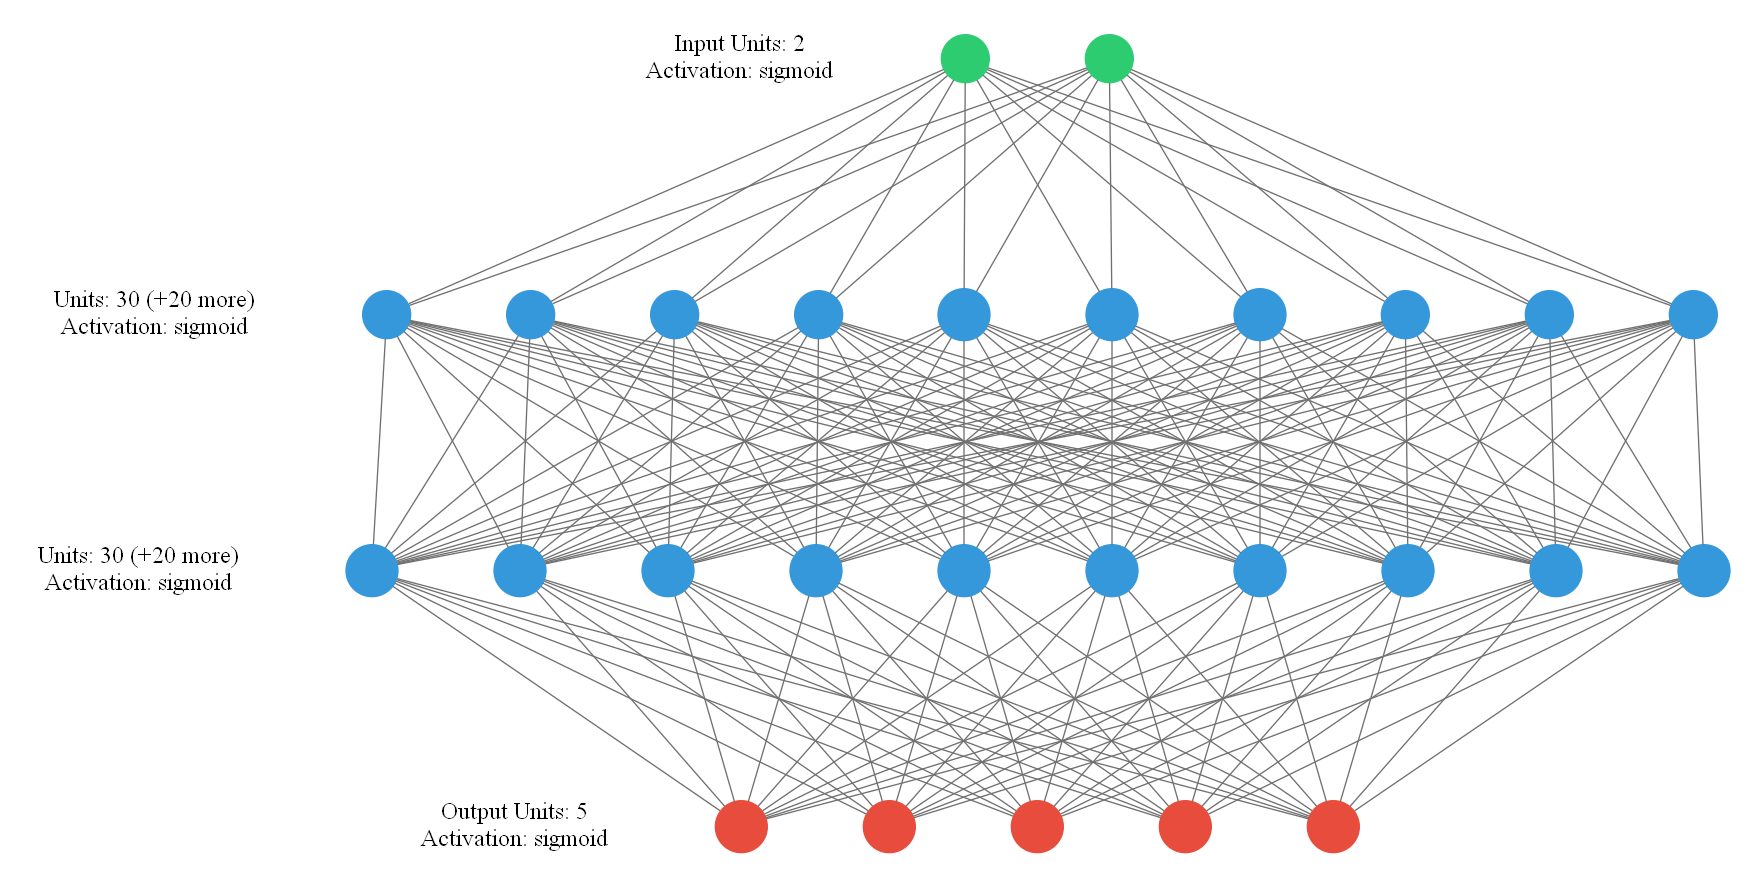

In [35]:
from keras_visualizer import visualizer 
visualizer(moj_keras_model, filename='img_NS',format = "png",view=False)
Image("img_NS.png")

<h1>Testovanie neuronovej siete</h1>

Pomocou funkcie predict_classes() predikujem vystupne kategorie na zaklade testovacich udajov.

In [21]:
import warnings
warnings.filterwarnings('ignore') # ignorujem errory, ktore mi vypisuje
predikcie = moj_keras_model.predict_classes(X_test)
predikcie

array([1, 2, 2, 2, 3, 3, 4, 2, 3, 4, 3, 4, 4, 4, 2, 1, 4, 2, 2, 3, 4, 3,
       4, 3, 0, 4, 2, 4, 4, 0, 4, 4, 4, 4, 1, 0, 0, 2, 4, 1, 4, 4, 4, 4,
       4, 1, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 2, 0, 4, 4, 0,
       4, 3, 2, 4, 4, 4, 1, 0, 4, 0, 1, 4, 2, 4, 4, 4, 4, 2, 1, 4, 4, 3,
       1, 4, 3, 4, 2, 4, 4, 4, 3, 0, 2, 4], dtype=int64)

Nasledne pomocou funkcie argmax vypisem skutocne-vysledne hodnoty.

In [22]:
skutHodnoty = y_test.argmax(1) # argmax vrati poziciu najvacsej hodnoty
skutHodnoty

array([1, 2, 2, 2, 4, 3, 4, 2, 3, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 3, 4, 3,
       4, 3, 0, 4, 2, 4, 4, 0, 4, 4, 4, 4, 1, 0, 0, 2, 4, 1, 4, 4, 4, 4,
       4, 1, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 2, 0, 4, 4, 0,
       4, 3, 2, 4, 4, 4, 1, 0, 4, 1, 1, 4, 2, 4, 4, 4, 4, 2, 1, 4, 4, 4,
       1, 4, 3, 4, 2, 4, 4, 4, 3, 0, 2, 4], dtype=int64)

 Argmax nam vrati poziciu najvacsej hodnoty. Napr.: na indexe 1 sa nachadza jednotka -> funkcia argmax nam vrati cislo 1

In [23]:
y_test[:1]

array([[0., 1., 0., 0., 0.]], dtype=float32)

Argmax nam vrati poziciu najvacsej hodnoty. Napr.: na indexe 2 sa nachadza jednotka -> funkcia argmax nam vrati cislo 2 (predposledna hodnota)

In [24]:
y_test[-2,:]

array([0., 0., 1., 0., 0.], dtype=float32)

Pomocou funkcie accuracy_score() porovnavame pole predikcie a pole skutHodnoty a zistime presnost nasho modelu.

In [25]:
from sklearn import metrics
presnost = metrics.accuracy_score(predikcie, skutHodnoty)*100 
print('Presnost natrenovaneho modelu: ', presnost, "%")

Presnost natrenovaneho modelu:  95.0 %


Vizualizacia presnosti a chybovosti natrenovaneho modelu na zaklade trenovacich a testovacich dat:

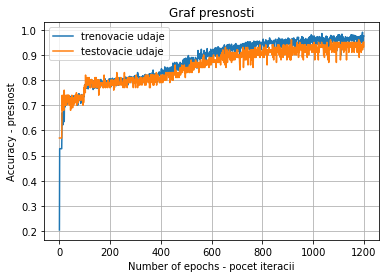

Presnost natrenovaneho modelu na zaklade trenovacich dat: 97.5 %
Presnost natrenovaneho modelu na zaklade testovacich dat: 95.0 %


In [26]:
plt.title("Graf presnosti")
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Number of epochs - pocet iteracii")
plt.ylabel("Accuracy - presnost")
plt.legend(["trenovacie udaje","testovacie udaje"])
plt.grid()
plt.show()

print("Presnost natrenovaneho modelu na zaklade trenovacich dat:",round(history.history["accuracy"][-1]*100,1),"%")
print("Presnost natrenovaneho modelu na zaklade testovacich dat:",round(history.history["val_accuracy"][-1]*100,1),"%")

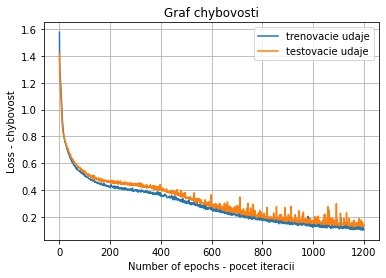

Chybovost natrenovaneho modelu na zaklade trenovacich dat: 10.7 %
Chybovost natrenovaneho modelu na zaklade testovacich dat: 13.7 %


In [27]:
plt.title('Graf chybovosti')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Number of epochs - pocet iteracii')
plt.ylabel('Loss - chybovost')
plt.legend(["trenovacie udaje","testovacie udaje"])
plt.grid()
plt.show()

print("Chybovost natrenovaneho modelu na zaklade trenovacich dat:",round(history.history["loss"][-1]*100,1),"%")
print("Chybovost natrenovaneho modelu na zaklade testovacich dat:",round(history.history["val_loss"][-1]*100,1),"%")

Na zaver som si zadefinoval metodu predictBMICategory, ktora mi predikuje vystupnu BMI kategoriu podla vysky a vahy.

In [28]:
# metoda predictBMICategory - predikcia na zaklade vysky a vahy
def predictBMICategory(height,weight):
    vyskaVaha = ([[height, weight]]) 
    y_pred = moj_keras_model.predict_classes(vyskaVaha)
    if y_pred == 0:
        return 'Underweight'
    elif y_pred == 1:
        return 'Normal'
    elif y_pred == 2:
        return 'Overweight'
    elif y_pred == 3:
        return 'Obese'
    elif y_pred == 4:
        return 'Exremely obese'

Pre porovnavanie som si zadefinoval dalsiu metodu realBMICategory, ktora mi vrati vystupnu BMI kategoriu podla vyska a vahy, na zaklade vzorca: BMI = m/h²

In [29]:
# metoda realBMICategory - skutocny vysledok na zaklade vysky a vahy
def realBMICategory(height,weight):
    
    bmi = round( weight/np.square(height) *10000,1) #BMI = m/h²
    
    if ( bmi <= 18.5 ):
        return "Underweight" # underweight = podvaha
        
    elif ( 18.5 < bmi <= 24.9 ):
        return "Normal" # normal = normalna vaha
        
    elif ( 25 <= bmi <= 29.9 ):
        return "Overweight" # overweight = nadvaha
    
    elif ( 30 <= bmi <= 34.9 ):
        return "Obese" # obese = obezny
        
    elif ( bmi >= 35 ):
        return "Exremely obese" # extremely obese = extremne obezny

In [31]:
# a=predikcia; b = skutocny vysledok
a = predictBMICategory(185,63)
b = realBMICategory(185,63)
print("Predikcia -",a)
print("Skutocnost -",b)

Predikcia - Underweight
Skutocnost - Underweight
